In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_excel('strong1232225913425462952.xlsx')
df.head(5)

,Date,Workout Name,Exercise Name,Set Order,Weight,Weight Unit,Reps,RPE,Distance,Distance Unit,Seconds,Notes,Workout Notes,Workout Duration
0,2019-11-21 13:00:00,Entrenamiento de mediodÃ­a,Lunge (Dumbbell),1,10.0,kg,6.0,NaN,NaN,NaN,0,NaN,Warmup,32m
1,2019-11-21 13:00:00,Entrenamiento de mediodÃ­a,Lunge (Dumbbell),2,10.0,kg,6.0,NaN,NaN,NaN,0,NaN,NaN,32m
2,2019-11-21 13:00:00,Entrenamiento de mediodÃ­a,Bench Press (Barbell),1,20.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,32m
3,2019-11-21 13:00:00,Entrenamiento de mediodÃ­a,Bench Press (Barbell),2,20.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,32m
4,2019-11-21 13:00:00,Entrenamiento de mediodÃ­a,Bench Press (Barbell),3,20.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,32m


In [9]:
set_ejercicios = df['Exercise Name'].unique()
set_fechas = df['Date'].unique()

In [5]:
contenedor_df_todos_los_ejercicios = []

for ejercicio in set_ejercicios:
    filas_ejercicio_especifico = df.loc[df['Exercise Name'] == ejercicio]
    fechas_ejercicio_especifico = filas_ejercicio_especifico['Date'].unique()

    df_fecha_volumen_total = pd.DataFrame(columns = ['Date', 'Volume'])
    
    for fecha in fechas_ejercicio_especifico:
        sets_ejercicio_especifico = filas_ejercicio_especifico.loc[filas_ejercicio_especifico['Date'] == fecha]
        volumen_total_por_fecha = 0

        for index, set in sets_ejercicio_especifico.iterrows():
            volumen_ejercicio = set['Reps'] * set['Weight']
            volumen_total_por_fecha += volumen_ejercicio

        df_fecha_volumen_total.loc[len(df_fecha_volumen_total.index)] = [fecha, volumen_total_por_fecha]
    
    contenedor_df_todos_los_ejercicios.append(df_fecha_volumen_total)

ConversionError: Failed to convert value(s) to axis units: array([NaT, NaT, NaT, 0.0, nan, nan, nan, nan, 0.0, nan, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 50.0, 45.0, 52.5, 52.5, 60.0, 60.0, 90.0, 90.0,
       90.0, 115.5, 115.5, 132.0, 132.0, 108.0, 108.0, 108.0, 108.0,
       108.0, 126.0, 126.0, 144.0, 144.0, 153.0, 153.0, 178.5, 204.0, 0.0,
       178.5], dtype=object)

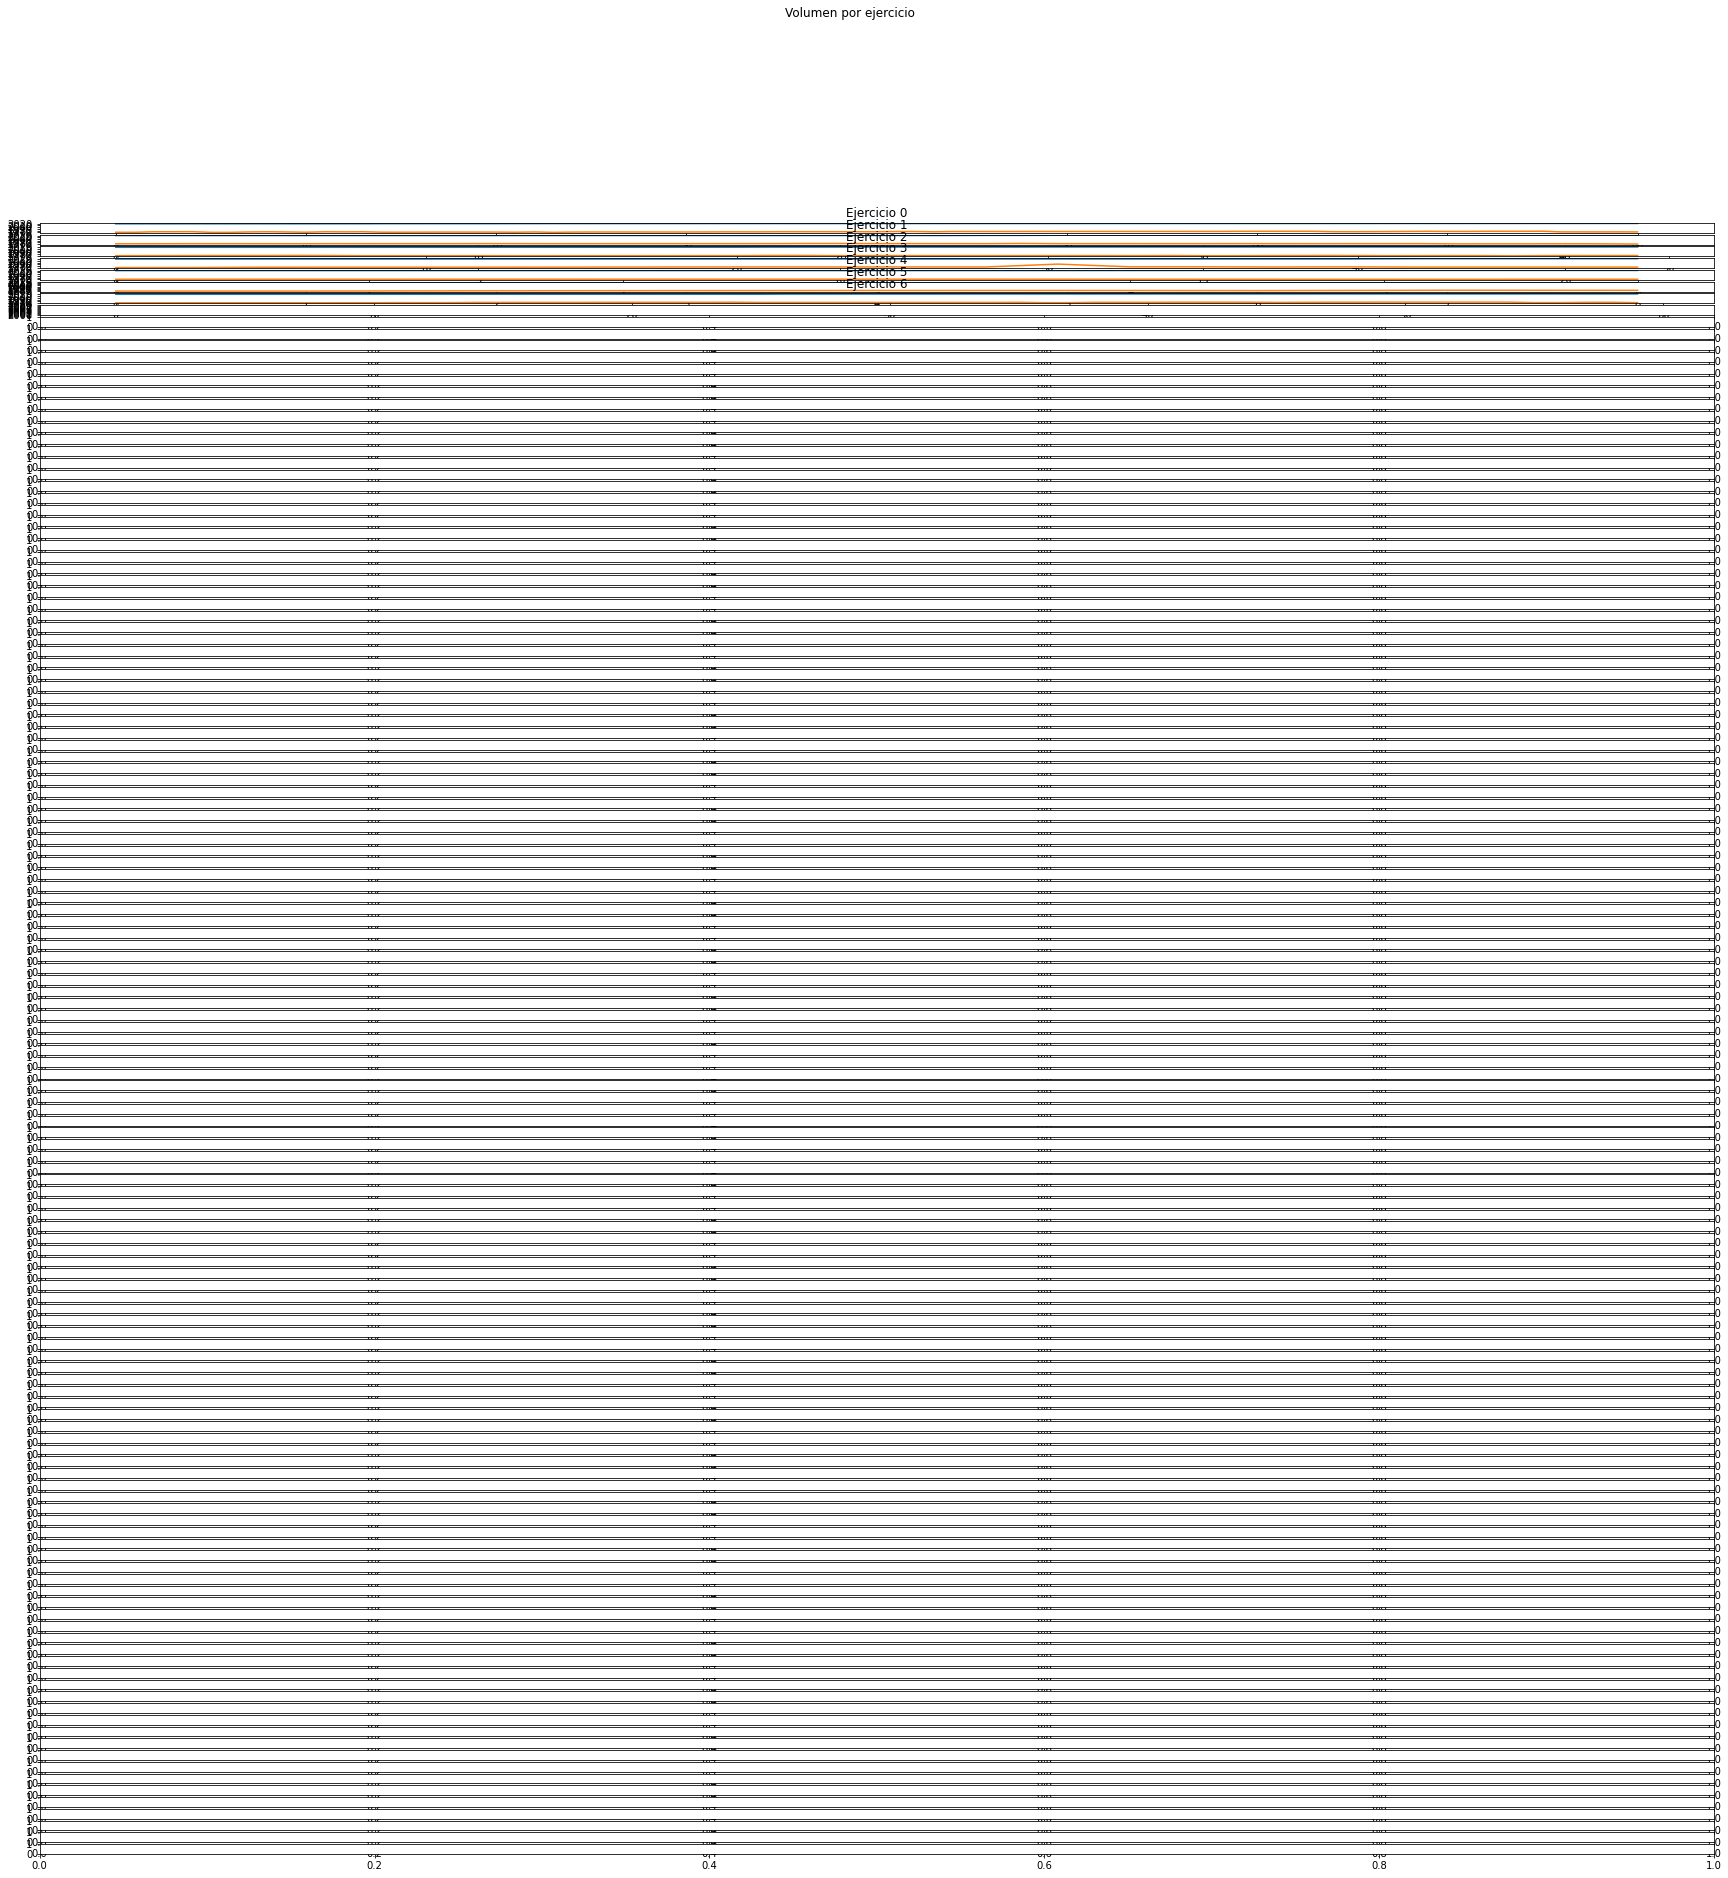

In [19]:
fig, axis = plt.subplots(len(contenedor_df_todos_los_ejercicios))
fig.set_size_inches(30, 30)
fig.suptitle('Volumen por ejercicio')

for i in range(len(contenedor_df_todos_los_ejercicios)):
    axis[i].plot(contenedor_df_todos_los_ejercicios[i])
    axis[i].set_title(f'Ejercicio {i}')